<a href="https://colab.research.google.com/github/stefanbanducci/Coursera_Capstone/blob/master/Final_Accident_Severity_ML_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seattle Accident Severity Model

### This project is part of the Coursera Applied Data Science Capstone and seeks to predict accident severity in the Seattle area using a variety of features.  The project will leverage open data from Seattle GeoData.  

###1.  Import Libraries and Raw Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score, classification_report
from sklearn.model_selection import train_test_split

print("Hello Capstone Project Course!")


Hello Capstone Project Course!


In [2]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  


In [4]:
 df = pd.read_csv('/content/drive/My Drive/Collisions.csv')

###2. Explore Data

In [7]:
print(df.shape)
df.dtypes

(221389, 40)


X                  float64
Y                  float64
OBJECTID             int64
INCKEY               int64
COLDETKEY            int64
REPORTNO            object
STATUS              object
ADDRTYPE            object
INTKEY             float64
LOCATION            object
EXCEPTRSNCODE       object
EXCEPTRSNDESC       object
SEVERITYCODE        object
SEVERITYDESC        object
COLLISIONTYPE       object
PERSONCOUNT          int64
PEDCOUNT             int64
PEDCYLCOUNT          int64
VEHCOUNT             int64
INJURIES             int64
SERIOUSINJURIES      int64
FATALITIES           int64
INCDATE             object
INCDTTM             object
JUNCTIONTYPE        object
SDOT_COLCODE       float64
SDOT_COLDESC        object
INATTENTIONIND      object
UNDERINFL           object
WEATHER             object
ROADCOND            object
LIGHTCOND           object
PEDROWNOTGRNT       object
SDOTCOLNUM         float64
SPEEDING            object
ST_COLCODE          object
ST_COLDESC          object
S

In [5]:
#Replace any values marked as 'unknown' with Null
df.replace("Unknown", np.nan, inplace = True)

In [9]:
df.corr()


,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
X,1.000000,-0.156679,0.006357,0.005355,0.005351,0.119137,0.019323,0.011989,-0.002009,0.005984,0.014992,-0.004926,0.000525,0.018688,-0.004941,-0.000365,0.013864
Y,-0.156679,1.000000,-0.022349,-0.025648,-0.025666,-0.114036,-0.029713,0.009356,0.023596,-0.016637,0.001901,-0.002121,-0.004707,-0.025983,-0.007231,0.003748,0.007094
OBJECTID,0.006357,-0.022349,1.000000,0.925664,0.925068,0.046047,-0.065586,0.021389,0.029042,-0.099343,-0.004433,-0.003508,0.000109,-0.084006,0.970188,0.023356,0.050446
INCKEY,0.005355,-0.025648,0.925664,1.000000,0.999996,0.047873,-0.066177,0.022006,0.025244,-0.110020,-0.004539,-0.003233,0.000260,-0.073010,0.990963,0.014651,0.042165
COLDETKEY,0.005351,-0.025666,0.925068,0.999996,1.000000,0.047849,-0.066107,0.022005,0.025203,-0.110062,-0.004530,-0.003216,0.000270,-0.072831,0.990963,0.014536,0.042041
INTKEY,0.119137,-0.114036,0.046047,0.047873,0.047849,1.000000,0.005361,-0.000688,0.000394,-0.004437,0.012468,0.010804,0.013698,0.007684,0.031025,-0.009820,0.019704
PERSONCOUNT,0.019323,-0.029713,-0.065586,-0.066177,-0.066107,0.005361,1.000000,0.011465,-0.009309,0.559723,0.319239,0.107059,0.046550,0.008267,0.010710,-0.008399,-0.010357
PEDCOUNT,0.011989,0.009356,0.021389,0.022006,0.022005,-0.000688,0.011465,1.000000,-0.015907,-0.155362,0.167387,0.132472,0.072488,0.261013,0.021197,0.001251,0.553844
PEDCYLCOUNT,-0.002009,0.023596,0.029042,0.025244,0.025203,0.000394,-0.009309,-0.015907,1.000000,-0.151765,0.122506,0.062344,0.010933,0.369268,0.031470,0.455571,0.103589
VEHCOUNT,0.005984,-0.016637,-0.099343,-0.110020,-0.110062,-0.004437,0.559723,-0.155362,-0.151765,1.000000,0.143102,-0.003462,-0.010441,-0.078377,-0.016617,-0.075691,-0.121263


In [6]:
print("Addrtype: \n", df['ADDRTYPE'].value_counts(), "\n")
print("Vehcount: \n", df['VEHCOUNT'].value_counts(), "\n")
print("Lightcond: \n", df['LIGHTCOND'].value_counts(), "\n")
print("Weather: \n", df['WEATHER'].value_counts(), "\n")
print("Hitparkedcar: \n", df['HITPARKEDCAR'].value_counts(), "\n")
print("Severity Code: \n", df['SEVERITYCODE'].value_counts(), "\n")
print("Severity Desc: \n", df['SEVERITYDESC'].value_counts(), "\n")
print("Underinfl: \n", df['UNDERINFL'].value_counts(), "\n")
print("Inattentionind: \n", df['INATTENTIONIND'].value_counts(), "\n")

for col in df.columns:
  print(col, ": \n",  df[col].value_counts(), "\n")

Addrtype: 
 Block           144917
Intersection     71884
Alley              876
Name: ADDRTYPE, dtype: int64 

Vehcount: 
 2     150334
1      27898
0      26454
3      13377
4       2523
5        557
6        153
7         53
8         18
9         10
11         6
10         2
15         1
14         1
13         1
12         1
Name: VEHCOUNT, dtype: int64 

Lightcond: 
 Daylight                    119448
Dark - Street Lights On      50125
Dusk                          6082
Dawn                          2608
Dark - No Street Lights       1579
Dark - Street Lights Off      1239
Other                          244
Dark - Unknown Lighting         23
Name: LIGHTCOND, dtype: int64 

Weather: 
 Clear                       114694
Raining                      34036
Overcast                     28543
Snowing                        919
Other                          860
Fog/Smog/Smoke                 577
Sleet/Hail/Freezing Rain       116
Blowing Sand/Dirt               56
Severe Crosswind     

In [7]:
#look for missing data
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 



X
False    213918
True       7471
Name: X, dtype: int64

Y
False    213918
True       7471
Name: Y, dtype: int64

OBJECTID
False    221389
Name: OBJECTID, dtype: int64

INCKEY
False    221389
Name: INCKEY, dtype: int64

COLDETKEY
False    221389
Name: COLDETKEY, dtype: int64

REPORTNO
False    221389
Name: REPORTNO, dtype: int64

STATUS
False    221389
Name: STATUS, dtype: int64

ADDRTYPE
False    217677
True       3712
Name: ADDRTYPE, dtype: int64

INTKEY
True     149505
False     71884
Name: INTKEY, dtype: int64

LOCATION
False    216801
True       4588
Name: LOCATION, dtype: int64

EXCEPTRSNCODE
True     120403
False    100986
Name: EXCEPTRSNCODE, dtype: int64

EXCEPTRSNDESC
True     209610
False     11779
Name: EXCEPTRSNDESC, dtype: int64

SEVERITYCODE
False    221388
True          1
Name: SEVERITYCODE, dtype: int64

SEVERITYDESC
False    199794
True      21595
Name: SEVERITYDESC, dtype: int64

COLLISIONTYPE
False    195159
True      26230
Name: COLLISIONTYPE, dtype: int64

PERSONC

###3. Preprocessing / Data Cleaning

In [8]:
#Drop rows with missing values from important features
df.dropna(subset=["SEVERITYDESC"], axis=0, inplace=True)
df.dropna(subset=["WEATHER"], axis=0, inplace=True)
df.dropna(subset=["LIGHTCOND"], axis=0, inplace=True)
df.dropna(subset=["ROADCOND"], axis=0, inplace=True)
df.dropna(subset=["UNDERINFL"], axis=0, inplace=True)
df.dropna(subset=["JUNCTIONTYPE"], axis=0, inplace=True)
df.dropna(subset=["ADDRTYPE"], axis=0, inplace=True)
df.dropna(subset=["COLLISIONTYPE"], axis=0, inplace=True)

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)
print(df.shape)
print(df['SEVERITYDESC'].value_counts())


(173046, 40)
Property Damage Only Collision    113592
Injury Collision                   56144
Serious Injury Collision            2975
Fatality Collision                   335
Name: SEVERITYDESC, dtype: int64


In [17]:
#Replace HITPARKEDCAR feature with 0 for 'no' and 1 for 'yes'
print("HITPARKEDCAR before: \n", df['HITPARKEDCAR'].value_counts())
df['HITPARKEDCAR'].replace("N", 0, inplace=True)
df['HITPARKEDCAR'].replace("Y", 1, inplace=True)
print("HITPARKEDCAR after \n: ", df['HITPARKEDCAR'].value_counts())

#Replace SPEEDING feature with 0 for 'no' and 1 for 'yes'
print("Speeding before: \n", df['SPEEDING'].value_counts())
df['SPEEDING'].replace(np.nan, 0, inplace=True)
df['SPEEDING'].replace("Y", 1, inplace=True)
print("Speeding after \n: ", df['SPEEDING'].value_counts())

#Fix UNDERINFL feature with 0 for 'no' and 1 for 'yes'
print("UNDERINFL before: \n", df['UNDERINFL'].value_counts())
df['UNDERINFL'].replace("N", "0", inplace=True)
df['UNDERINFL'].replace("Y", "1", inplace=True)
print("UNDERINFL after: \n", df['UNDERINFL'].value_counts())

#Fix INATTENTIONIND feature with 0 for 'no' and 1 for 'yes'
print("INATTENTIONIND before: \n", df['INATTENTIONIND'].value_counts())
df['INATTENTIONIND'].replace(np.nan, "0", inplace=True)
df['INATTENTIONIND'].replace("Y", "1", inplace=True)
print("INATTENTIONIND after: \n", df['INATTENTIONIND'].value_counts())

#Make ADDRTYPE integers 1="Block", 2="Intersection", 3="Alley"
print("ADDRTYPE before: \n", df['ADDRTYPE'].value_counts())
df['ADDRTYPE'].replace("Block", 1, inplace=True)
df['ADDRTYPE'].replace("Intersection", 2, inplace=True)
df['ADDRTYPE'].replace("Alley", 3, inplace=True)
print("ADDRTYPE after: \n", df['ADDRTYPE'].value_counts())

#Make new severity column with integers:  1 = "Property Damage" or "Injury", 2 = "Serious Injury" or "Fatality"
df = df.assign(SEVERITY = df['SEVERITYCODE'])
df.loc[df['SEVERITYCODE'] == '1', 'SEVERITY'] = 1
df.loc[df['SEVERITYCODE'] == '2', 'SEVERITY'] = 1
df.loc[df['SEVERITYCODE'] == '2b', 'SEVERITY'] = 2
df.loc[df['SEVERITYCODE'] == '3', 'SEVERITY'] = 2
df['SEVERITY'].value_counts()





HITPARKEDCAR before: 
 N    168330
Y      4716
Name: HITPARKEDCAR, dtype: int64
HITPARKEDCAR after 
:  0    168330
1      4716
Name: HITPARKEDCAR, dtype: int64
Speeding before: 
 Y    9611
Name: SPEEDING, dtype: int64
Speeding after 
:  0    163435
1      9611
Name: SPEEDING, dtype: int64
UNDERINFL before: 
 N    91232
0    72422
Y     5231
1     4161
Name: UNDERINFL, dtype: int64
UNDERINFL after: 
 0    163654
1      9392
Name: UNDERINFL, dtype: int64
INATTENTIONIND before: 
 Y    28686
Name: INATTENTIONIND, dtype: int64
INATTENTIONIND after: 
 0    144360
1     28686
Name: INATTENTIONIND, dtype: int64
ADDRTYPE before: 
 Block           109161
Intersection     63699
Alley              186
Name: ADDRTYPE, dtype: int64
ADDRTYPE after: 
 1    109161
2     63699
3       186
Name: ADDRTYPE, dtype: int64


1    169736
2      3310
Name: SEVERITY, dtype: int64

In [36]:
# Create date, time of day, weekday, and hour fields to explore potential correlations with accident severity

df.head()
df['INCDATE'] =  pd.to_datetime(df['INCDATE'])
df['INCDTTM2'] =  pd.to_datetime(df['INCDTTM'])
df['INCTIME'] = df['INCDTTM2'].dt.strftime('%H:%M')
df['INCHOUR'] = df['INCDTTM2'].dt.strftime('%H')
df['INCHOUR'].value_counts()


df['WEEKDAY'] = df['INCDATE'].dt.day_name()
df.loc[df['WEEKDAY'] == 'Sunday', 'WEEKDAY'] = 0
df.loc[df['WEEKDAY'] == 'Monday', 'WEEKDAY'] = 1
df.loc[df['WEEKDAY'] == 'Tuesday', 'WEEKDAY'] = 2
df.loc[df['WEEKDAY'] == 'Wednesday', 'WEEKDAY'] = 3
df.loc[df['WEEKDAY'] == 'Thursday', 'WEEKDAY'] = 4
df.loc[df['WEEKDAY'] == 'Friday', 'WEEKDAY'] = 5
df.loc[df['WEEKDAY'] == 'Saturday', 'WEEKDAY'] = 6
df['WEEKDAY'].value_counts()

df['TIMEOFDAY'] = df['INCHOUR']
df.loc[df['TIMEOFDAY'] == '00', 'TIMEOFDAY'] = "Late_Night"
df.loc[df['TIMEOFDAY'] == '01', 'TIMEOFDAY'] = "Late_Night"
df.loc[df['TIMEOFDAY'] == '02', 'TIMEOFDAY'] = "Late_Night"
df.loc[df['TIMEOFDAY'] == '03', 'TIMEOFDAY'] = "Late_Night"
df.loc[df['TIMEOFDAY'] == '04', 'TIMEOFDAY'] = "Late_Night"
df.loc[df['TIMEOFDAY'] == '05', 'TIMEOFDAY'] = "Morning Commute"
df.loc[df['TIMEOFDAY'] == '06', 'TIMEOFDAY'] = "Morning Commute"
df.loc[df['TIMEOFDAY'] == '07', 'TIMEOFDAY'] = "Morning Commute"
df.loc[df['TIMEOFDAY'] == '08', 'TIMEOFDAY'] = "Morning Commute"
df.loc[df['TIMEOFDAY'] == '09', 'TIMEOFDAY'] = "Morning Commute"
df.loc[df['TIMEOFDAY'] == '10', 'TIMEOFDAY'] = "Mid Day"
df.loc[df['TIMEOFDAY'] == '11', 'TIMEOFDAY'] = "Mid Day"
df.loc[df['TIMEOFDAY'] == '12', 'TIMEOFDAY'] = "Mid Day"
df.loc[df['TIMEOFDAY'] == '13', 'TIMEOFDAY'] = "Mid Day"
df.loc[df['TIMEOFDAY'] == '14', 'TIMEOFDAY'] = "Mid Day"
df.loc[df['TIMEOFDAY'] == '15', 'TIMEOFDAY'] = "Mid Day"
df.loc[df['TIMEOFDAY'] == '16', 'TIMEOFDAY'] = "Afternoon Commute"
df.loc[df['TIMEOFDAY'] == '17', 'TIMEOFDAY'] = "Afternoon Commute"
df.loc[df['TIMEOFDAY'] == '18', 'TIMEOFDAY'] = "Afternoon Commute"
df.loc[df['TIMEOFDAY'] == '19', 'TIMEOFDAY'] = "Afternoon Commute"
df.loc[df['TIMEOFDAY'] == '20', 'TIMEOFDAY'] = "Evening"
df.loc[df['TIMEOFDAY'] == '21', 'TIMEOFDAY'] = "Evening"
df.loc[df['TIMEOFDAY'] == '22', 'TIMEOFDAY'] = "Evening"
df.loc[df['TIMEOFDAY'] == '23', 'TIMEOFDAY'] = "Evening"

df.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,YEAR,SEVERITY,INCDTTM2,INCTIME,INCHOUR,WEEKDAY,TIMEOFDAY
0,-122.320757,47.609408,1,328476,329976,EA08706,Matched,1,NaN,BROADWAY BETWEEN E COLUMBIA ST AND BOYLSTON AVE,,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,0,0,0,2020-01-22 00:00:00+00:00,1/22/2020 3:21:00 PM,Mid-Block (not related to intersection),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,0,Raining,Wet,Dark - Street Lights On,NaN,NaN,0,11,From same direction - both going straight - bo...,0,0,0,2020,1,2020-01-22 15:21:00,15:21,15,3,Mid Day
1,-122.319561,47.662221,2,328142,329642,EA06882,Matched,1,NaN,8TH AVE NE BETWEEN NE 45TH E ST AND NE 47TH ST,,NaN,1,Property Damage Only Collision,Parked Car,2,0,0,2,0,0,0,2020-01-07 00:00:00+00:00,1/7/2020 8:00:00 AM,Mid-Block (not related to intersection),15.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE...",0,0,Clear,Dry,Daylight,NaN,NaN,0,32,One parked--one moving,0,0,1,2020,1,2020-01-07 08:00:00,08:00,08,2,Morning Commute
2,-122.374194,47.564076,6,332024,333524,3838312,Matched,1,NaN,SW AVALON WAY BETWEEN SW GENESEE ST AND 35TH A...,,NaN,1,Property Damage Only Collision,Rear Ended,2,0,0,2,0,0,0,2020-06-11 00:00:00+00:00,6/11/2020 5:07:00 PM,Mid-Block (not related to intersection),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",0,0,Clear,Dry,Daylight,NaN,NaN,0,14,From same direction - both going straight - on...,0,0,0,2020,1,2020-06-11 17:07:00,17:07,17,4,Afternoon Commute
3,-122.290734,47.709276,7,328431,329931,3854579,Matched,1,NaN,35TH AVE NE BETWEEN NE 110TH ST AND NE 113TH ST,,NaN,1,Property Damage Only Collision,Other,2,0,0,1,0,0,0,2020-02-03 00:00:00+00:00,2/3/2020 9:49:00 AM,Mid-Block (but intersection related),28.0,MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT,0,0,Clear,Wet,Daylight,NaN,NaN,1,50,Fixed object,0,0,0,2020,1,2020-02-03 09:49:00,09:49,09,1,Morning Commute
4,-122.336565,47.590398,9,328781,330281,EA12104,Matched,2,30386.0,COLORADO AVE S AND S ATLANTIC ST,,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,0,0,0,2020-01-30 00:00:00+00:00,1/30/2020 8:32:00 AM,At Intersection (intersection related),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",0,0,Overcast,Dry,Daylight,NaN,NaN,0,81,Same direction -- both turning left -- both mo...,0,0,0,2020,1,2020-01-30 08:32:00,08:32,08,4,Morning Commute


SEVERITY      1    2
YEAR                
2004      10954  250
2005      13725  228
2006      13837  321
2007      13002  254
2008      11773  209
2009       9842  221
2010       9287  187
2011       8975  145
2012       9108  188
2013       8966  173
2014       9749  181
2015      10016  152
2016       9996  172
2017       9870  180
2018       9268  183
2019       8301  181
2020       3067   85


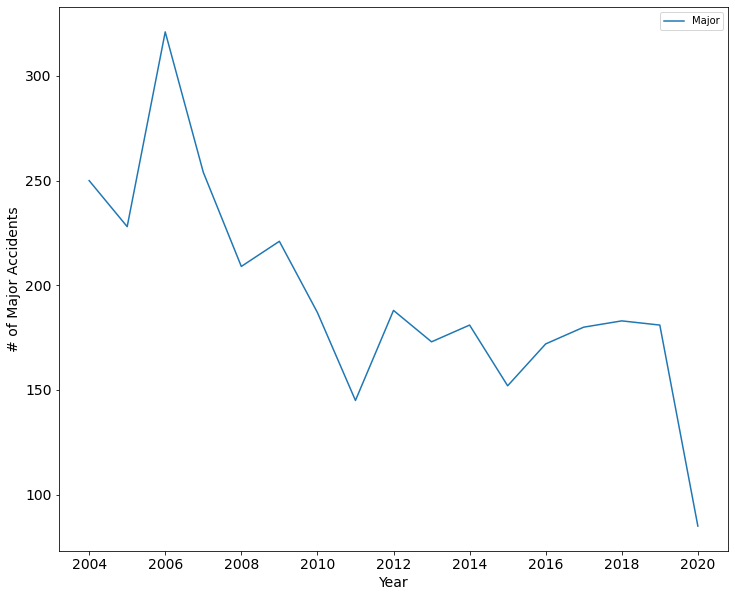

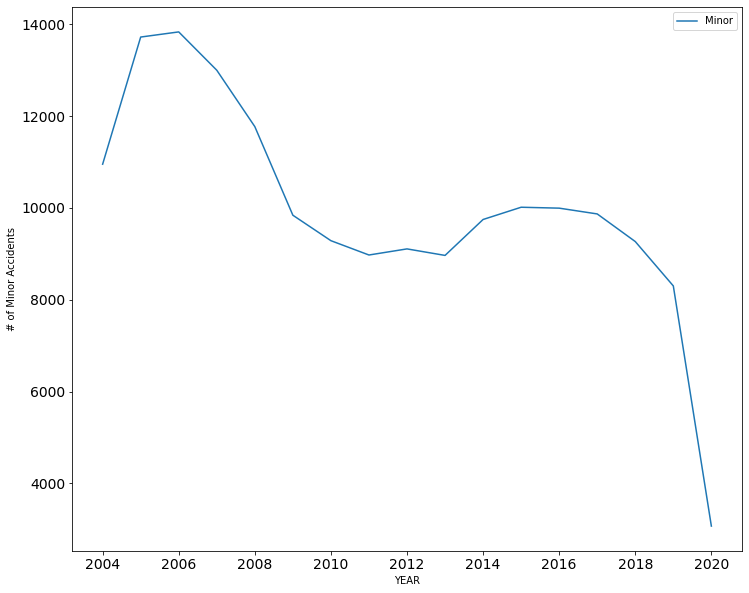

In [82]:
df['YEAR'] = pd.DatetimeIndex(df['INCDATE']).year
#df.head()

df[["SEVERITY"]] = df[["SEVERITY"]].astype("int")

print(pd.crosstab(df['SEVERITY'], df['YEAR']).T)

import matplotlib.pyplot as plt

df_bar = pd.crosstab(df['SEVERITY'], df['YEAR'])

df_barT = df_bar.T
df_barT.columns = ["Minor", "Major"]
df_barT
df_major = df_barT[['Major']]
df_minor = df_barT[['Minor']]

df_major.plot(figsize=(12,10), fontsize = 14)
plt.xlabel("Year", fontsize = 14)
plt.ylabel("# of Major Accidents", fontsize = 14)
plt.show()

df_minor.plot(figsize=(12,10), fontsize = 14)
plt.ylabel("# of Minor Accidents")
plt.show()

In [83]:
#Keep only columns we might consider using or that we want to investigate further
df2 = df[['WEEKDAY', 'PERSONCOUNT', 'ADDRTYPE', 'HITPARKEDCAR', 'JUNCTIONTYPE', 'COLLISIONTYPE', 'SPEEDING', 'VEHCOUNT', 'UNDERINFL', 'INATTENTIONIND', 'TIMEOFDAY', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SEVERITY']]
df2.head()

,WEEKDAY,PERSONCOUNT,ADDRTYPE,HITPARKEDCAR,JUNCTIONTYPE,COLLISIONTYPE,SPEEDING,VEHCOUNT,UNDERINFL,INATTENTIONIND,TIMEOFDAY,WEATHER,ROADCOND,LIGHTCOND,SEVERITY
0,3,2,1,0,Mid-Block (not related to intersection),Sideswipe,0,2,0,0,Mid Day,Raining,Wet,Dark - Street Lights On,1
1,2,2,1,1,Mid-Block (not related to intersection),Parked Car,0,2,0,0,Morning Commute,Clear,Dry,Daylight,1
2,4,2,1,0,Mid-Block (not related to intersection),Rear Ended,0,2,0,0,Afternoon Commute,Clear,Dry,Daylight,1
3,1,2,1,0,Mid-Block (but intersection related),Other,1,1,0,0,Morning Commute,Clear,Wet,Daylight,1
4,4,2,2,0,At Intersection (intersection related),Sideswipe,0,2,0,0,Morning Commute,Overcast,Dry,Daylight,1


In [84]:
#convert datatypes to prep for modeling

df2[["SEVERITY"]] = df[["SEVERITY"]].astype("int")
df2[["UNDERINFL"]] = df[["UNDERINFL"]].astype("int")
df2[["SPEEDING"]] = df[["SPEEDING"]].astype("int")
df2[["INATTENTIONIND"]] = df[["INATTENTIONIND"]].astype("int")
df2[["VEHCOUNT"]] = df[["VEHCOUNT"]].astype("int")
df2[["ADDRTYPE"]] = df[["ADDRTYPE"]].astype("int")

df2[["WEEKDAY"]] = df[["WEEKDAY"]].astype("int")
#df2[["INCHOUR"]] = df[["INCHOUR"]].astype("int")
df2.dtypes

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


WEEKDAY            int64
PERSONCOUNT        int64
ADDRTYPE           int64
HITPARKEDCAR       int64
JUNCTIONTYPE      object
COLLISIONTYPE     object
SPEEDING           int64
VEHCOUNT           int64
UNDERINFL          int64
INATTENTIONIND     int64
TIMEOFDAY         object
WEATHER           object
ROADCOND          object
LIGHTCOND         object
SEVERITY           int64
dtype: object

In [93]:
import sklearn.feature_selection
df_temp = df2[['WEEKDAY', 'ADDRTYPE', 'HITPARKEDCAR', 'SPEEDING', 'UNDERINFL', 'INATTENTIONIND']]
chi_sq = sklearn.feature_selection.chi2(df_temp, df2['SEVERITY'])

pd.options.display.float_format = '{:,.15f}'.format
chi_sq_tab = pd.DataFrame(chi_sq)
chi_sq_tab.columns = df_temp.columns
chi_sq_tab

,WEEKDAY,ADDRTYPE,HITPARKEDCAR,SPEEDING,UNDERINFL,INATTENTIONIND
0,0.924492044156358,44.403930582915578,55.706794689953362,426.010536530843638,550.128259610378336,61.343685914588640
1,0.336298265856289,0.000000000026715,0.000000000000084,0.000000000000000,0.000000000000000,0.000000000000005


In [88]:
#balance dataset - equal samples of severe vs. minor accidents

#del df3

is_prop = df2['SEVERITY'] == 1
df3 = df2[is_prop].sample(n=9500)

is_serfatinjury = df2['SEVERITY'] == 2
df_serinj = df2[is_serfatinjury]
df3 = df3.append([df_serinj]*3, ignore_index=True)  #oversample more serious injuries / accidents

df3.reset_index(inplace=True)

df3['SEVERITY'].value_counts()


2    9930
1    9500
Name: SEVERITY, dtype: int64

In [ ]:
df3.head()

,index,WEEKDAY,PERSONCOUNT,ADDRTYPE,HITPARKEDCAR,JUNCTIONTYPE,COLLISIONTYPE,SPEEDING,VEHCOUNT,UNDERINFL,INATTENTIONIND,TIMEOFDAY,WEATHER,ROADCOND,LIGHTCOND,SEVERITY
0,0,6,2,2,0,At Intersection (intersection related),Left Turn,0,2,0,0,Afternoon Commute,Clear,Dry,Daylight,1
1,1,2,2,2,0,At Intersection (intersection related),Other,0,2,0,1,Mid Day,Clear,Dry,Daylight,1
2,2,5,3,1,0,Mid-Block (not related to intersection),Parked Car,0,2,0,0,Morning Commute,Overcast,Wet,Daylight,1
3,3,0,0,1,0,Mid-Block (but intersection related),Parked Car,0,3,0,0,Evening,Clear,Dry,Dark - Street Lights On,1
4,4,1,3,1,0,Mid-Block (not related to intersection),Sideswipe,0,2,0,1,Morning Commute,Clear,Dry,Daylight,1


SPEEDING                 0                 1
SEVERITY                                    
1        0.942842105263158 0.057157894736842
2        0.860725075528701 0.139274924471299


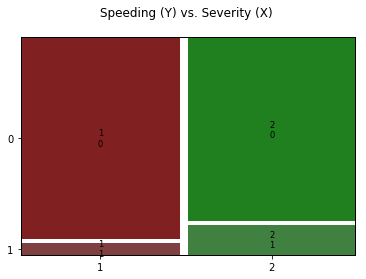

UNDERINFL                 0                 1
SEVERITY                                     
1         0.945368421052632 0.054631578947368
2         0.851661631419940 0.148338368580060


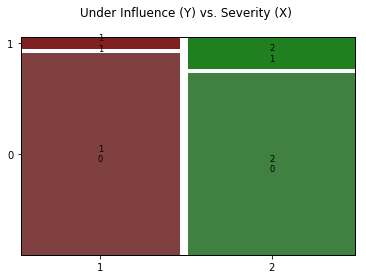

COLLISIONTYPE            Angles  ...         Sideswipe
SEVERITY                         ...                  
1             0.206210526315789  ... 0.097789473684211
2             0.141389728096677  ... 0.023867069486405

[2 rows x 10 columns]


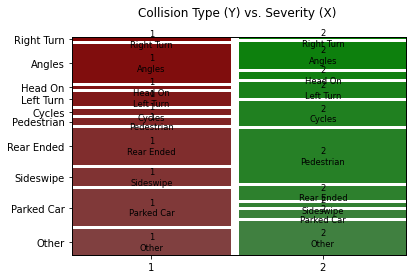

ROADCOND               Dry  ...               Wet
SEVERITY                    ...                  
1        0.704736842105263  ... 0.281052631578947
2        0.745317220543807  ... 0.245317220543807

[2 rows x 8 columns]


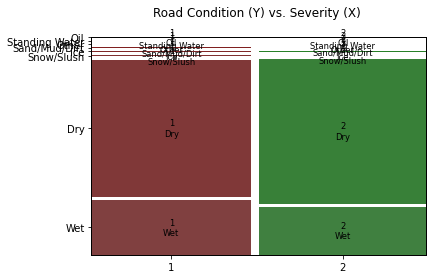

LIGHTCOND  Dark - No Street Lights  ...             Other
SEVERITY                            ...                  
1                0.007894736842105  ... 0.001894736842105
2                0.007854984894260  ... 0.001208459214502

[2 rows x 8 columns]


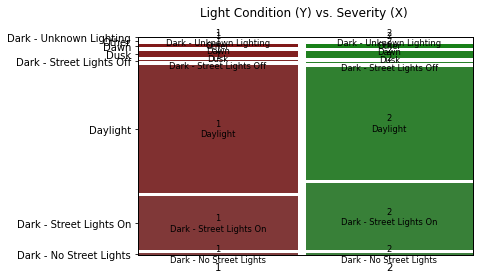

TIMEOFDAY  Afternoon Commute  ...   Morning Commute
SEVERITY                      ...                  
1          0.229578947368421  ... 0.153052631578947
2          0.240483383685801  ... 0.141389728096677

[2 rows x 5 columns]


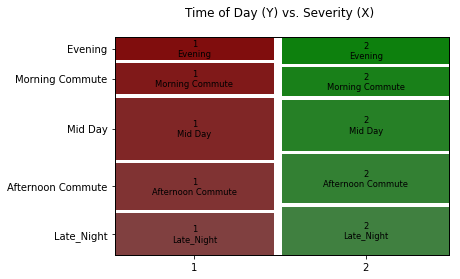

ADDRTYPE                 1                 2                 3
SEVERITY                                                      
1        0.641368421052632 0.357368421052632 0.001263157894737
2        0.496676737160121 0.502114803625378 0.001208459214502


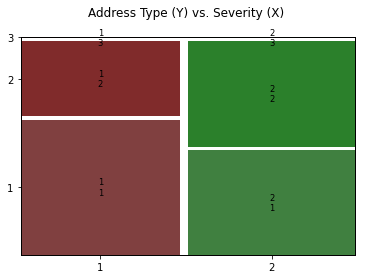

JUNCTIONTYPE  At Intersection (but not related to intersection)  ...     Ramp Junction
SEVERITY                                                         ...                  
1                                             0.010947368421053  ... 0.000631578947368
2                                             0.007250755287009  ... 0.001510574018127

[2 rows x 6 columns]


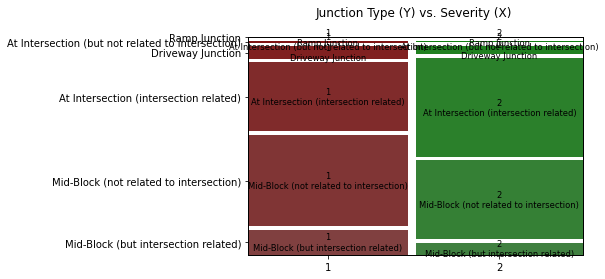

INATTENTIONIND                 0                 1
SEVERITY                                          
1              0.833894736842105 0.166105263157895
2              0.889123867069486 0.110876132930514


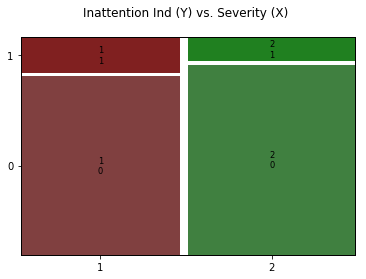

WEATHER   Blowing Sand/Dirt  ...           Snowing
SEVERITY                     ...                  
1         0.000526315789474  ... 0.005157894736842
2         0.000000000000000  ... 0.003021148036254

[2 rows x 10 columns]


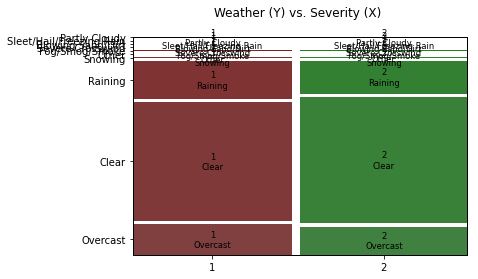

TIMEOFDAY,Afternoon Commute,Evening,Late_Night,Mid Day,Morning Commute
SEVERITY,,,,,
1,0.229578947368421,0.109368421052632,0.204210526315789,0.303789473684211,0.153052631578947
2,0.240483383685801,0.130211480362538,0.235347432024169,0.252567975830816,0.141389728096677


In [97]:
#mosaic
from statsmodels.graphics.mosaicplot import mosaic

print(pd.crosstab(df3['SEVERITY'], df3['SPEEDING']).apply(lambda r: r/r.sum(), axis=1))
mosaic(df3, ['SEVERITY', 'SPEEDING'], gap=.025, title = "Speeding (Y) vs. Severity (X) \n")
plt.show()

print(pd.crosstab(df3['SEVERITY'], df3['UNDERINFL']).apply(lambda r: r/r.sum(), axis=1))
mosaic(df3, ['SEVERITY', 'UNDERINFL'], gap=.025, title = "Under Influence (Y) vs. Severity (X) \n")
plt.show()

print(pd.crosstab(df3['SEVERITY'], df3['COLLISIONTYPE']).apply(lambda r: r/r.sum(), axis=1))
xtabcolltype =  pd.crosstab(df3['SEVERITY'], df3['COLLISIONTYPE']).apply(lambda r: r/r.sum(), axis=1)
mosaic(df3, ['SEVERITY', 'COLLISIONTYPE'], gap=.025, title = "Collision Type (Y) vs. Severity (X) \n")
plt.show()

print(pd.crosstab(df3['SEVERITY'], df3['ROADCOND']).apply(lambda r: r/r.sum(), axis=1))
mosaic(df3, ['SEVERITY', 'ROADCOND'], gap=.025, title = "Road Condition (Y) vs. Severity (X) \n")
plt.show()

print(pd.crosstab(df3['SEVERITY'], df3['LIGHTCOND']).apply(lambda r: r/r.sum(), axis=1))
mosaic(df3, ['SEVERITY', 'LIGHTCOND'], gap=.025, title = "Light Condition (Y) vs. Severity (X) \n")
plt.show()

print(pd.crosstab(df3['SEVERITY'], df3['TIMEOFDAY']).apply(lambda r: r/r.sum(), axis=1))
xtabtime =  pd.crosstab(df3['SEVERITY'], df3['TIMEOFDAY']).apply(lambda r: r/r.sum(), axis=1)
mosaic(df3, ['SEVERITY', 'TIMEOFDAY'], gap=.025, title = "Time of Day (Y) vs. Severity (X) \n")
plt.show()

print(pd.crosstab(df3['SEVERITY'], df3['ADDRTYPE']).apply(lambda r: r/r.sum(), axis=1))
mosaic(df3, ['SEVERITY', 'ADDRTYPE'], gap=.025, title = "Address Type (Y) vs. Severity (X) \n")
plt.show()

print(pd.crosstab(df3['SEVERITY'], df3['JUNCTIONTYPE']).apply(lambda r: r/r.sum(), axis=1))
mosaic(df3, ['SEVERITY', 'JUNCTIONTYPE'], gap=.025, title = "Junction Type (Y) vs. Severity (X) \n")
plt.show()

print(pd.crosstab(df3['SEVERITY'], df3['INATTENTIONIND']).apply(lambda r: r/r.sum(), axis=1))
mosaic(df3, ['SEVERITY', 'INATTENTIONIND'], gap=.025, title = "Inattention Ind (Y) vs. Severity (X) \n")
plt.show()

print(pd.crosstab(df3['SEVERITY'], df3['WEATHER']).apply(lambda r: r/r.sum(), axis=1))
mosaic(df3, ['SEVERITY', 'WEATHER'], gap=.025, title = "Weather (Y) vs. Severity (X) \n")
plt.show()

xtabtime.head()

In [ ]:
#one hot encoding

one_hot_features = df3[['WEATHER', 'LIGHTCOND', 'ROADCOND', 'ADDRTYPE', 'WEEKDAY','COLLISIONTYPE', 'JUNCTIONTYPE','TIMEOFDAY']]
converted_one_hot = pd.get_dummies(data=one_hot_features, columns=['WEATHER', 'LIGHTCOND', 'ROADCOND', 'ADDRTYPE', 'WEEKDAY','COLLISIONTYPE', 'JUNCTIONTYPE', 'TIMEOFDAY'])
df3 = df3.drop(['WEATHER', 'LIGHTCOND', 'ROADCOND', 'ADDRTYPE', 'WEEKDAY','COLLISIONTYPE', 'JUNCTIONTYPE', 'TIMEOFDAY'],axis = 1)
df3 = df3.join(converted_one_hot)
df3.head()

,index,PERSONCOUNT,HITPARKEDCAR,SPEEDING,VEHCOUNT,UNDERINFL,INATTENTIONIND,SEVERITY,WEATHER_Blowing Sand/Dirt,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Other,WEATHER_Overcast,WEATHER_Partly Cloudy,WEATHER_Raining,WEATHER_Severe Crosswind,WEATHER_Sleet/Hail/Freezing Rain,WEATHER_Snowing,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,ROADCOND_Dry,ROADCOND_Ice,ROADCOND_Oil,ROADCOND_Other,ROADCOND_Sand/Mud/Dirt,ROADCOND_Snow/Slush,ROADCOND_Standing Water,ROADCOND_Wet,ADDRTYPE_1,ADDRTYPE_2,ADDRTYPE_3,WEEKDAY_0,WEEKDAY_1,WEEKDAY_2,WEEKDAY_3,WEEKDAY_4,WEEKDAY_5,WEEKDAY_6,COLLISIONTYPE_Angles,COLLISIONTYPE_Cycles,COLLISIONTYPE_Head On,COLLISIONTYPE_Left Turn,COLLISIONTYPE_Other,COLLISIONTYPE_Parked Car,COLLISIONTYPE_Pedestrian,COLLISIONTYPE_Rear Ended,COLLISIONTYPE_Right Turn,COLLISIONTYPE_Sideswipe,JUNCTIONTYPE_At Intersection (but not related to intersection),JUNCTIONTYPE_At Intersection (intersection related),JUNCTIONTYPE_Driveway Junction,JUNCTIONTYPE_Mid-Block (but intersection related),JUNCTIONTYPE_Mid-Block (not related to intersection),JUNCTIONTYPE_Ramp Junction,TIMEOFDAY_Afternoon Commute,TIMEOFDAY_Evening,TIMEOFDAY_Late_Night,TIMEOFDAY_Mid Day,TIMEOFDAY_Morning Commute
0,0,2,0,0,2,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,1,2,0,0,2,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,2,3,0,0,2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,3,0,0,0,3,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,4,3,0,0,2,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1


In [ ]:
#re-examine chi-squared statistics for one hot encoded variables to inform whether some can be dropped
import sklearn.feature_selection

dependent = df3['SEVERITY']

df_temp = df3.drop(['SEVERITY', 'index', 'VEHCOUNT', 'PERSONCOUNT' ], axis=1)
chi_sq = sklearn.feature_selection.chi2(df_temp, dependent)

chi_sq_tab = pd.DataFrame(chi_sq)
chi_sq_tab.columns = df_temp.columns
sorted_chi = chi_sq_tab.T.sort_values(by=[1], ascending=False)

to_be_dropped = sorted_chi.T.columns[0:19].to_list()

#create dataframe with all columns with chi-squared test p-value < .1 dropped
df_hold = df3.drop(to_be_dropped, axis=1)

#sorted_chi.to_csv('chi_sq_featureselect.csv')

In [ ]:
#Re-examine correlation matrix for one hot encoded variables to inform whether some can be dropped
df5 = df3.corr()
df5.tail(25)
#df5 = df3.groupby(['INCHOUR', 'SEVERITY']).size()

,index,PERSONCOUNT,HITPARKEDCAR,SPEEDING,VEHCOUNT,UNDERINFL,INATTENTIONIND,SEVERITY,WEATHER_Blowing Sand/Dirt,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Other,WEATHER_Overcast,WEATHER_Partly Cloudy,WEATHER_Raining,WEATHER_Severe Crosswind,WEATHER_Sleet/Hail/Freezing Rain,WEATHER_Snowing,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,ROADCOND_Dry,ROADCOND_Ice,ROADCOND_Oil,ROADCOND_Other,ROADCOND_Sand/Mud/Dirt,ROADCOND_Snow/Slush,ROADCOND_Standing Water,ROADCOND_Wet,ADDRTYPE_1,ADDRTYPE_2,ADDRTYPE_3,WEEKDAY_0,WEEKDAY_1,WEEKDAY_2,WEEKDAY_3,WEEKDAY_4,WEEKDAY_5,WEEKDAY_6,COLLISIONTYPE_Angles,COLLISIONTYPE_Cycles,COLLISIONTYPE_Head On,COLLISIONTYPE_Left Turn,COLLISIONTYPE_Other,COLLISIONTYPE_Parked Car,COLLISIONTYPE_Pedestrian,COLLISIONTYPE_Rear Ended,COLLISIONTYPE_Right Turn,COLLISIONTYPE_Sideswipe,JUNCTIONTYPE_At Intersection (but not related to intersection),JUNCTIONTYPE_At Intersection (intersection related),JUNCTIONTYPE_Driveway Junction,JUNCTIONTYPE_Mid-Block (but intersection related),JUNCTIONTYPE_Mid-Block (not related to intersection),JUNCTIONTYPE_Ramp Junction,TIMEOFDAY_Afternoon Commute,TIMEOFDAY_Evening,TIMEOFDAY_Late_Night,TIMEOFDAY_Mid Day,TIMEOFDAY_Morning Commute
WEEKDAY_3,0.003033,-0.026666,-0.009130,-0.022681,-0.014651,-0.028177,-0.002096,0.003010,-0.006556,0.008240,0.024362,-0.002775,-0.000150,-0.005078,-0.008435,-0.005863,-0.009725,-0.020603,-0.005592,0.004807,-0.051603,-0.005078,0.027225,0.042618,-0.002634,0.009935,0.019064,-0.012444,0.011772,-0.006606,0.014627,-0.009939,-0.002149,-0.015974,-0.002490,0.001222,0.020135,-0.149321,-0.159319,-0.167247,1.000000,-0.176974,-0.185194,-0.161638,-0.012231,0.034834,0.003896,0.000347,-0.030709,-0.008990,0.021144,-0.005150,0.009297,0.005279,-0.000690,0.001706,0.015513,0.001770,-0.009172,-0.003406,0.003679,-0.022149,-0.027234,0.005822,0.041306
WEEKDAY_4,0.002186,0.014282,-0.007026,-0.024372,0.016696,-0.039817,0.006782,0.004387,-0.006949,-0.016722,-0.009170,0.016988,-0.003646,-0.005382,0.021240,-0.006215,0.019356,0.009388,-0.002483,-0.003783,-0.034340,0.005976,0.013093,0.035966,-0.015671,0.004138,-0.023322,0.002506,0.001850,-0.012434,-0.006215,0.007810,-0.003270,0.023267,-0.023781,0.024356,-0.009035,-0.158270,-0.168868,-0.177271,-0.176974,1.000000,-0.196293,-0.171325,0.003523,0.007370,-0.001958,0.021540,-0.019304,-0.012916,0.004809,0.002300,-0.009214,0.002306,-0.020229,0.028620,0.009469,-0.007789,-0.023245,-0.012368,0.009813,-0.012510,-0.032276,0.011838,0.023064
WEEKDAY_5,-0.018629,-0.000176,-0.003228,-0.009795,0.011219,-0.003946,0.001173,-0.012360,0.001263,0.006274,-0.010753,0.003023,0.009518,-0.005632,-0.010955,-0.006504,-0.010787,-0.019909,-0.008459,0.014443,-0.012457,-0.005632,-0.006677,0.014891,-0.005867,-0.000993,-0.000734,0.013528,-0.007271,0.006077,-0.006504,-0.022505,-0.013412,0.002551,-0.002056,0.002674,-0.009800,-0.165621,-0.176711,-0.185504,-0.185194,-0.196293,1.000000,-0.179283,-0.003966,0.007804,0.010988,0.009986,-0.011761,-0.005393,-0.007129,0.002282,0.005314,0.009021,0.002840,0.001651,0.004762,0.005724,-0.007224,-0.005883,0.013319,0.005850,-0.020304,0.004196,-0.002871
WEEKDAY_6,0.001672,0.042430,0.015000,0.047395,0.008055,0.058546,-0.021020,-0.001683,-0.006346,-0.003545,0.007387,-0.014911,-0.001435,0.031414,0.008673,-0.005676,-0.009415,-0.012776,-0.008901,0.003678,0.098897,0.007194,-0.034423,-0.089776,0.013093,0.002591,-0.006457,0.002309,-0.006346,0.004381,0.004812,-0.011088,0.008650,0.006955,0.031338,-0.030566,-0.012376,-0.144555,-0.154234,-0.161909,-0.161638,-0.171325,-0.179283,1.000000,0.016984,-0.028023,-0.000933,-0.014768,0.034392,0.015925,-0.033055,0.005221,-0.007545,-0.003230,0.000111,-0.030653,-0.001780,-0.001967,0.031909,0.009479,-0.036086,0.052223,0.071558,-0.011327,-0.076050
COLLISIONTYPE_Angles,-0.073968,0.077089,-0.060196,-0.040266,0.198138,-0.047189,-0.067295,-0.079424,0.001253,0.008396,-0.0058

###4. Building data set for first business objective (broadly identifying key variables that are correlated with / drive severe vs. minor accidents to identify proactive approaches to mitigate the risk of sever accidents)

In [ ]:
#create features dataframe and target dataframe

X = df_hold.drop(['VEHCOUNT', 'PERSONCOUNT', 'SEVERITY','index', 'COLLISIONTYPE_Other'], axis=1)
#X = df3.drop(['index', 'ROADCOND_Oil', 'ROADCOND_Sand/Mud/Dirt', 'ROADCOND_Standing Water', 'LIGHTCOND_Dark - Unknown Lighting', 'LIGHTCOND_Other', 'LIGHTCOND_Dark - No Street Lights', 'LIGHTCOND_Dark - Street Lights Off', 'WEATHER_Other'], axis=1)
y = df_hold['SEVERITY']

Z=X

#normalize data
X = np.asarray(X)
y = np.asarray(y)

from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

print(y.shape)
print(X.shape)
X


(19430,)
(19430, 41)


array([[-0.13720202, -0.33065822, -0.33590077, ..., -0.3748679 ,
        -0.53350548, -0.62461264],
       [-0.13720202, -0.33065822, -0.33590077, ..., -0.3748679 ,
        -0.53350548,  1.60099227],
       [-0.13720202, -0.33065822, -0.33590077, ..., -0.3748679 ,
        -0.53350548, -0.62461264],
       ...,
       [-0.13720202, -0.33065822, -0.33590077, ..., -0.3748679 ,
        -0.53350548, -0.62461264],
       [-0.13720202, -0.33065822, -0.33590077, ..., -0.3748679 ,
         1.87439499, -0.62461264],
       [-0.13720202, -0.33065822, -0.33590077, ...,  2.66760635,
        -0.53350548, -0.62461264]])

In [ ]:
#train test split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = .25)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(14572, 41)
(4858, 41)
(14572,)
(4858,)


###5.  Modeling for first business objective

### 5.1 KNN Model (All Data)

In [ ]:
#KNN modeling

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score, classification_report

k=10
acc = np.zeros((k-1))

for k in range(1, k):
    
    neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train, y_train)
    yhat = neigh.predict(x_test)
    acc[k-1] = jaccard_similarity_score(y_test, yhat)

acc
    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/me

array([0.70605187, 0.69020173, 0.70955126, 0.7021408 , 0.70996295,
       0.72416632, 0.72457802, 0.72149033, 0.7173734 ])

[0.70605187 0.69020173 0.70955126 0.7021408  0.70996295 0.72416632
 0.72457802 0.72149033 0.7173734 ] 



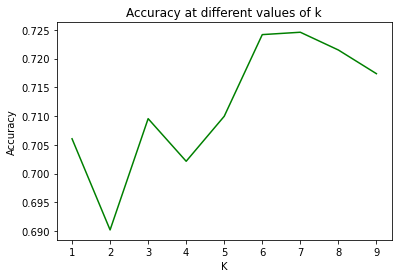

The k with the highest accuracy is:  7


In [ ]:
#KNN evaluation

print(acc, "\n")


#plot accuracy at different values of k
df_test_acc = pd.DataFrame(data = acc)

plt.plot(range(1, k+1), acc, 'g')
plt.title("Accuracy at different values of k")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()

print("The k with the highest accuracy is: ", acc.argmax()+1)


# print classification report
#print("")
#print("Classification_report:")
#print(classification_report(y_test, yhat))


In [ ]:
# define confusion matrix plot function

from sklearn.metrics import classification_report, confusion_matrix
import itertools


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



              precision    recall  f1-score   support

           1       0.70      0.78      0.74      2393
           2       0.76      0.67      0.71      2465

    accuracy                           0.72      4858
   macro avg       0.73      0.72      0.72      4858
weighted avg       0.73      0.72      0.72      4858

Confusion matrix, without normalization
[[1862  531]
 [ 809 1656]]


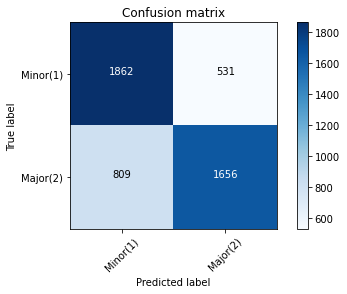

In [ ]:
# rerun KNN model for best K as defined previously 
neigh = KNeighborsClassifier(n_neighbors = 6).fit(x_train, y_train)
yhat = neigh.predict(x_test)

# Compute confusion matrix for KNN
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Minor(1)','Major(2)'],normalize= False,  title='Confusion matrix')

### 5.2 SVM Model (All Data)

In [ ]:
from sklearn import svm

kernal_opts = ['rbf', 'sigmoid', 'poly', 'linear']
svm_acc = np.zeros(4)
arr = 0

for kern in kernal_opts:
    clf = svm.SVC(kernel=kern)
    clf.fit(x_train, y_train) 
    svm_yhat = clf.predict(x_test)
    svm_acc[arr] = jaccard_similarity_score(y_test, svm_yhat) 
    arr = arr+1

svm_acc


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/me

array([0.75, 0.64, 0.75, 0.72])

              precision    recall  f1-score   support

           1       0.72      0.75      0.74      2393
           2       0.75      0.72      0.73      2465

    accuracy                           0.73      4858
   macro avg       0.73      0.73      0.73      4858
weighted avg       0.74      0.73      0.73      4858

Confusion matrix, without normalization
[[1798  595]
 [ 695 1770]]


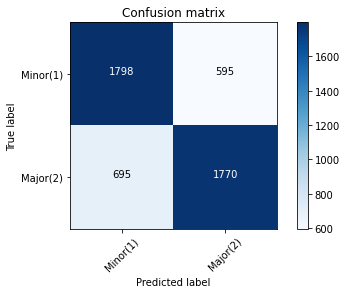

In [ ]:
# Run model for best SVM based on results of previous cell
from sklearn import svm

clf = svm.SVC(kernel='rbf')
clf.fit(x_train, y_train) 
svm_yhat = clf.predict(x_test)

# Compute confusion matrix for SVM
cnf_matrix = confusion_matrix(y_test, svm_yhat, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, svm_yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Minor(1)','Major(2)'],normalize= False,  title='Confusion matrix')

###5.3 Decision Tree Model (All Data)


In [ ]:

from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion = "entropy", max_depth = 3)
dtree.fit(x_train, y_train)
dtree_yhat = dtree.predict(x_test)

jaccard_similarity_score(y_test, dtree_yhat)


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.7083161794977357

              precision    recall  f1-score   support

           1       0.65      0.87      0.75      2393
           2       0.82      0.55      0.66      2465

    accuracy                           0.71      4858
   macro avg       0.73      0.71      0.70      4858
weighted avg       0.74      0.71      0.70      4858

Confusion matrix, without normalization
[[2089  304]
 [1113 1352]]


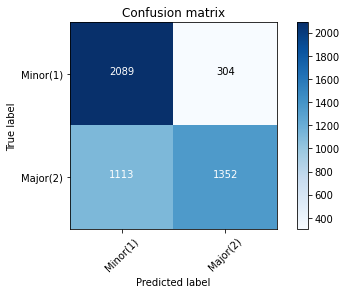

In [ ]:
# Compute confusion matrix for decision tree
cnf_matrix = confusion_matrix(y_test, dtree_yhat, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, dtree_yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Minor(1)','Major(2)'],normalize= False,  title='Confusion matrix')

[Text(418.5, 428.08500000000004, 'COLLISIONTYPE_Pedestrian <= 0.901\nentropy = 1.0\nsamples = 14572\nvalue = [7107, 7465]\nclass = Minor'),
 Text(209.25, 305.775, 'COLLISIONTYPE_Cycles <= 1.531\nentropy = 0.989\nsamples = 12160\nvalue = [6834, 5326]\nclass = Major'),
 Text(104.625, 183.46500000000003, 'SPEEDING <= 1.347\nentropy = 0.97\nsamples = 10989\nvalue = [6605, 4384]\nclass = Major'),
 Text(52.3125, 61.15499999999997, 'entropy = 0.937\nsamples = 9639\nvalue = [6228, 3411]\nclass = Major'),
 Text(156.9375, 61.15499999999997, 'entropy = 0.854\nsamples = 1350\nvalue = [377, 973]\nclass = Minor'),
 Text(313.875, 183.46500000000003, 'INATTENTIONIND <= 1.074\nentropy = 0.713\nsamples = 1171\nvalue = [229, 942]\nclass = Minor'),
 Text(261.5625, 61.15499999999997, 'entropy = 0.682\nsamples = 1006\nvalue = [182, 824]\nclass = Minor'),
 Text(366.1875, 61.15499999999997, 'entropy = 0.862\nsamples = 165\nvalue = [47, 118]\nclass = Minor'),
 Text(627.75, 305.775, 'JUNCTIONTYPE_Mid-Block (not

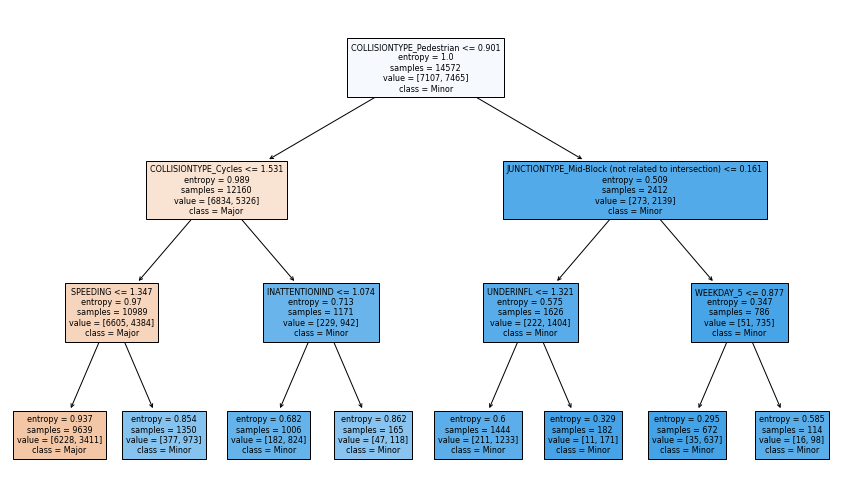

In [ ]:
#plotting the decision tree
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 
fig, ax = plt.subplots(figsize=(15, 9))
tree.plot_tree(dtree, fontsize=8, feature_names = Z.columns, class_names = ['Major', 'Minor'], filled=True)

### 5.4 Logistic Regression Model (All Data)

Jaccard:  0.7433100041169205 

              precision    recall  f1-score   support

           1       0.71      0.79      0.75      2357
           2       0.78      0.70      0.74      2501

    accuracy                           0.74      4858
   macro avg       0.75      0.74      0.74      4858
weighted avg       0.75      0.74      0.74      4858

Confusion matrix, without normalization
[[1864  493]
 [ 754 1747]]
Logistic Regression Coefficients: 



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


,0
COLLISIONTYPE_Pedestrian,0.76
COLLISIONTYPE_Cycles,0.40
SPEEDING,0.38
UNDERINFL,0.27
COLLISIONTYPE_Head On,0.14
WEATHER_Clear,0.07
TIMEOFDAY_Late_Night,0.06
TIMEOFDAY_Afternoon Commute,0.04
ADDRTYPE_2,0.04
ROADCOND_Dry,0.04


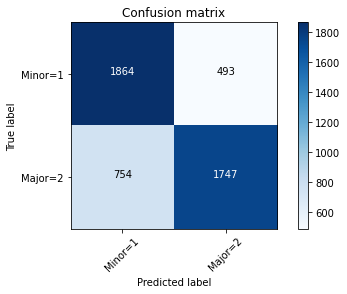

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


LR1 = LogisticRegression(C=0.01, solver='newton-cg').fit(x_train,y_train)

lr_yhat1 = LR1.predict(x_test)

lr_yhat_prob1 = LR1.predict_proba(x_test)

print("Jaccard: ", jaccard_similarity_score(y_test, lr_yhat1), "\n")

cnf_matrix = confusion_matrix(y_test, lr_yhat1, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, lr_yhat1))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Minor=1','Major=2'],normalize= False,  title='Confusion matrix')


print("Logistic Regression Coefficients: \n")
coef_data = pd.DataFrame(LR1.coef_)
coef_data.columns = Z.columns
pd.options.display.float_format = '{:,.2f}'.format
coef_data.T.sort_values(by=[0], ascending=False)


In [ ]:
Z.columns


Index(['HITPARKEDCAR', 'SPEEDING', 'UNDERINFL', 'INATTENTIONIND',
       'WEATHER_Blowing Sand/Dirt', 'WEATHER_Clear', 'WEATHER_Fog/Smog/Smoke',
       'WEATHER_Overcast', 'WEATHER_Partly Cloudy', 'WEATHER_Raining',
       'LIGHTCOND_Dark - Street Lights Off',
       'LIGHTCOND_Dark - Street Lights On',
       'LIGHTCOND_Dark - Unknown Lighting', 'LIGHTCOND_Dawn',
       'LIGHTCOND_Daylight', 'ROADCOND_Dry', 'ROADCOND_Oil',
       'ROADCOND_Sand/Mud/Dirt', 'ROADCOND_Snow/Slush', 'ROADCOND_Wet',
       'ADDRTYPE_1', 'ADDRTYPE_2', 'WEEKDAY_0', 'WEEKDAY_3',
       'COLLISIONTYPE_Angles', 'COLLISIONTYPE_Cycles', 'COLLISIONTYPE_Head On',
       'COLLISIONTYPE_Parked Car', 'COLLISIONTYPE_Pedestrian',
       'COLLISIONTYPE_Rear Ended', 'COLLISIONTYPE_Right Turn',
       'COLLISIONTYPE_Sideswipe',
       'JUNCTIONTYPE_At Intersection (but not related to intersection)',
       'JUNCTIONTYPE_At Intersection (intersection related)',
       'JUNCTIONTYPE_Driveway Junction',
       'JUNCTIONTYPE_Mi

### 6.  Modeling for Second Business Objective

### Logistic Regression Predictive Model (Limited to data fields potentially knowable by emergency response dispatch e.g., weather, light conditions, road conditions, approximate time of day, collision type)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

#predicting accident response
X2 = df3.drop(['JUNCTIONTYPE_Driveway Junction', 'JUNCTIONTYPE_At Intersection (but not related to intersection)', 'JUNCTIONTYPE_At Intersection (intersection related)', 'JUNCTIONTYPE_Ramp Junction', 'JUNCTIONTYPE_Mid-Block (but intersection related)', 'JUNCTIONTYPE_Mid-Block (not related to intersection)', 'INATTENTIONIND', 'UNDERINFL', 'SPEEDING', 'ROADCOND_Wet', 'WEATHER_Overcast', 'HITPARKEDCAR', 'PERSONCOUNT', 'VEHCOUNT', 'ADDRTYPE_1', 'ADDRTYPE_2', 'TIMEOFDAY_Evening', 'WEATHER_Blowing Sand/Dirt', 'LIGHTCOND_Dark - Unknown Lighting', 'ADDRTYPE_3', 'WEEKDAY_0', 'WEEKDAY_1', 'WEEKDAY_2', 'WEEKDAY_3', 'WEEKDAY_4', 'WEEKDAY_5', 'WEEKDAY_6', 'TIMEOFDAY_Afternoon Commute', 'TIMEOFDAY_Morning Commute', 'TIMEOFDAY_Mid Day', 'SEVERITY','index', 'COLLISIONTYPE_Other', 'ROADCOND_Other', 'ROADCOND_Sand/Mud/Dirt', 'ROADCOND_Standing Water', 'LIGHTCOND_Other', 'LIGHTCOND_Dark - No Street Lights', 'LIGHTCOND_Dark - Street Lights Off', 'WEATHER_Other'], axis=1)
#'JUNCTIONTYPE_Driveway Junction', 'JUNCTIONTYPE_At Intersection (but not related to intersection)', 'JUNCTIONTYPE_At Intersection (intersection related)', 'JUNCTIONTYPE_Ramp Junction', JUNCTIONTYPE_Mid-Block (but intersection related), JUNCTIONTYPE_Mid-Block (not related to intersection)
#understanding drivers of accident severity
#X2 = df3.drop(['INATTENTIONIND', 'ROADCOND_Wet', 'WEATHER_Overcast', 'HITPARKEDCAR', 'PERSONCOUNT', 'VEHCOUNT', 'ADDRTYPE_1', 'ADDRTYPE_2', 'TIMEOFDAY_Evening', 'WEATHER_Blowing Sand/Dirt', 'LIGHTCOND_Dark - Unknown Lighting', 'ADDRTYPE_3', 'WEEKDAY_0', 'WEEKDAY_1', 'WEEKDAY_2', 'WEEKDAY_3', 'WEEKDAY_4', 'WEEKDAY_5', 'WEEKDAY_6', 'TIMEOFDAY_Afternoon Commute', 'TIMEOFDAY_Morning Commute', 'TIMEOFDAY_Mid Day', 'SEVERITY','index', 'COLLISIONTYPE_Other', 'ROADCOND_Other', 'ROADCOND_Sand/Mud/Dirt', 'ROADCOND_Standing Water', 'LIGHTCOND_Other', 'LIGHTCOND_Dark - No Street Lights', 'LIGHTCOND_Dark - Street Lights Off', 'WEATHER_Other'], axis=1)
#AA = X2
#AA.corr()


,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Partly Cloudy,WEATHER_Raining,WEATHER_Severe Crosswind,WEATHER_Sleet/Hail/Freezing Rain,WEATHER_Snowing,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,ROADCOND_Dry,ROADCOND_Ice,ROADCOND_Oil,ROADCOND_Snow/Slush,COLLISIONTYPE_Angles,COLLISIONTYPE_Cycles,COLLISIONTYPE_Head On,COLLISIONTYPE_Left Turn,COLLISIONTYPE_Parked Car,COLLISIONTYPE_Pedestrian,COLLISIONTYPE_Rear Ended,COLLISIONTYPE_Right Turn,COLLISIONTYPE_Sideswipe,TIMEOFDAY_Late_Night
WEATHER_Clear,1.00,-0.08,-0.02,-0.65,-0.02,-0.03,-0.08,-0.15,-0.04,0.16,-0.01,0.73,-0.01,-0.02,-0.06,0.01,0.07,-0.04,0.00,0.04,-0.05,-0.02,0.00,0.01,-0.02
WEATHER_Fog/Smog/Smoke,-0.08,1.00,-0.00,-0.03,-0.00,-0.00,-0.00,0.05,0.01,-0.05,-0.00,-0.01,0.03,-0.00,-0.00,-0.01,-0.01,-0.01,-0.00,0.01,-0.02,0.00,-0.01,0.01,0.03
WEATHER_Partly Cloudy,-0.02,-0.00,1.00,-0.01,-0.00,-0.00,-0.00,0.02,-0.00,-0.02,-0.00,0.01,-0.00,-0.00,-0.00,-0.01,-0.00,-0.00,-0.00,-0.00,-0.01,-0.00,-0.00,-0.00,0.02
WEATHER_Raining,-0.65,-0.03,-0.01,1.00,-0.01,-0.01,-0.03,0.15,0.03,-0.16,0.01,-0.75,-0.04,0.02,-0.01,-0.00,-0.06,0.05,-0.01,-0.05,0.06,0.01,-0.01,-0.01,0.01
WEATHER_Severe Crosswind,-0.02,-0.00,-0.00,-0.01,1.00,-0.00,-0.00,-0.00,-0.00,-0.02,0.06,0.00,-0.00,-0.00,-0.00,-0.01,-0.00,-0.00,0.01,-0.01,0.02,-0.01,-0.00,-0.00,-0.01
WEATHER_Sleet/Hail/Freezing Rain,-0.03,-0.00,-0.00,-0.01,-0.00,1.00,-0.00,0.01,0.05,-0.02,-0.00,-0.04,0.11,-0.00,0.16,0.00,-0.01,0.05,-0.01,-0.01,-0.01,-0.01,-0.00,-0.01,-0.00
WEATHER_Snowing,-0.08,-0.00,-0.00,-0.03,-0.00,-0.00,1.00,0.02,-0.01,-0.02,-0.00,-0.09,0.19,-0.00,0.50,0.00,-0.02,0.00,-0.01,0.02,0.01,-0.01,-0.01,-0.00,-0.00
LIGHTCOND_Dark - Street Lights On,-0.15,0.05,0.02,0.15,-0.00,0.01,0.02,1.00,-0.09,-0.86,-0.13,-0.16,0.03,-0.00,0.02,-0.06,-0.08,0.02,-0.02,0.05,0.08,-0.08,-0.02,-0.06,0.28
LIGHTCOND_Dawn,-0.04,0.01,-0.00,0.03,-0.00,0.05,-0.01,-0.09,1.00,-0.17,-0.02,-0.05,0.03,-0.00,0.00,-0.01,-0.00,-0.00,0.00,-0.01,0.04,-0.01,-0.00,-0.00,-0.02
LIGHTCOND_Daylight,0.16,-0.05,-0.02,-0.16,-0.02,-0.02,-0.02,-0.86,-0.17,1.00,-0.24,0.18,-0.04,0.00,-0.01,0.07,0.08,-0.02,0.02,-0.05,-0.09,0.08,0.02,0.06,-0.26


In [ ]:
#normalize data
X2 = np.asarray(X2)
from sklearn import preprocessing
X2 = preprocessing.StandardScaler().fit(X2).transform(X2.astype(float))

from sklearn.model_selection import train_test_split

x2_train, x2_test, y2_train, y2_test = train_test_split(X2, y, test_size = .25)

print(x2_train.shape)
print(x2_test.shape)
print(y2_train.shape)
print(y2_test.shape)

#solvers = [[‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’]] 

LR = LogisticRegression(C=0.01, solver='newton-cg').fit(x2_train,y2_train)

lr_yhat = LR.predict(x2_test)

lr_yhat_prob = LR.predict_proba(x2_test)

#decisions = (LR.predict_proba(x2_test) >= 0.5).astype(int)
#decisions = pd.DataFrame(decisions)
#decisions.columns = ['Minor', 'Major']
#print(decisions['Major'].sum())
#print(decisions['Minor'].sum())

print(jaccard_similarity_score(y2_test, lr_yhat))

coef_data = pd.DataFrame(LR.coef_)
coef_data.columns = AA.columns
coef_data.T.sort_values(by=[0], ascending = False)

(14572, 25)
(4858, 25)
(14572,)
(4858,)
0.7039934129271305


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


,0
COLLISIONTYPE_Pedestrian,0.67
COLLISIONTYPE_Cycles,0.33
COLLISIONTYPE_Head On,0.16
ROADCOND_Dry,0.08
TIMEOFDAY_Late_Night,0.06
WEATHER_Clear,0.05
LIGHTCOND_Dark - Street Lights On,0.04
WEATHER_Partly Cloudy,0.04
ROADCOND_Ice,0.01
LIGHTCOND_Dusk,0.01


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


Jaccard:  0.7142857142857143
              precision    recall  f1-score   support

           1       0.70      0.73      0.71      2365
           2       0.73      0.70      0.71      2493

    accuracy                           0.71      4858
   macro avg       0.71      0.71      0.71      4858
weighted avg       0.72      0.71      0.71      4858

Confusion matrix, without normalization
[[1729  636]
 [ 752 1741]]


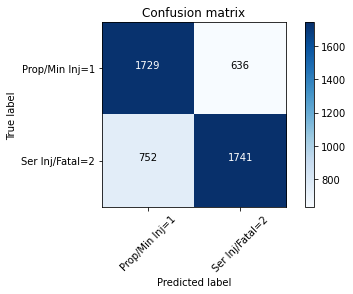

In [ ]:
print("Jaccard: ", jaccard_similarity_score(y2_test, lr_yhat))

cnf_matrix = confusion_matrix(y2_test, lr_yhat, labels=[1,2])
np.set_printoptions(precision=2)


print (classification_report(y2_test, lr_yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Prop/Min Inj=1','Ser Inj/Fatal=2'],normalize= False,  title='Confusion matrix')

